In [1]:
from osgeo import gdal,ogr,osr

In [5]:
aviris_img_org = gdal.Open('F:/wenqu/Aviris/site2a/resample/aviris_resample_clip_final')
aviris_org_geotransform = aviris_img_org.GetGeoTransform()
aviris_org_geotransform

(623889.044,
 4.565071278216736,
 -1.4832815729997475,
 7477193.58,
 -1.4832815729997475,
 -4.565071278216736)

In [10]:
aviris_img_org.ReadAsArray().dtype

dtype('float32')

In [2]:
trait_img = gdal.Open('F:/wenqu/trait_map/site2a_la_trait_map_projection_arcmap.tif')
trait_img_geotransformation = trait_img.GetGeoTransform()
#upper left x-coordinate
#pixel width
#row rotation
# upper left y-coordinates
# column rotation
# pixel height
trait_img_geotransformation
trait_width = trait_img.RasterXSize
trait_height = trait_img.RasterYSize


In [4]:
trait_img_geotransformation

(624177.7724566044,
 0.04886487256734882,
 0.0,
 7476931.791176738,
 0.0,
 -0.0188104367509304)

In [3]:
# Calculate the upper left and lower right coordinates for plant trait image upper left and lower right corner coordinates
trait_img_ulx = trait_img_geotransformation[0]# upper left x coordinates
trait_img_uly = trait_img_geotransformation[3]# upper left y coordinates
# lower right x coordinates
trait_img_lrx = trait_img_geotransformation[0] + (trait_width * trait_img_geotransformation[1]) + (trait_height * trait_img_geotransformation[2])
# lower right y coordinates
trait_img_lry = trait_img_geotransformation[3] + (trait_width * trait_img_geotransformation[4]) + (trait_height * trait_img_geotransformation[5])

# Print the results
print("Upper left: ({}, {})".format(trait_img_ulx, trait_img_uly))
print("Lower right: ({}, {})".format(trait_img_lrx, trait_img_lry))


Upper left: (624177.7724566044, 7476931.791176738)
Lower right: (624344.6948612945, 7476773.200384491)


In [6]:
#lower right
x_max, y_min = (trait_img_lrx, trait_img_lry)
#upper left
x_min, y_max = (trait_img_ulx, trait_img_uly)


x_offset = int((x_min - aviris_org_geotransform[0]) / aviris_org_geotransform[1])
y_offset = abs(int((aviris_org_geotransform[3] - y_min)) / abs(aviris_org_geotransform[5]))
x_max, y_min, x_min, y_max

xsize = int((x_max - x_min) / aviris_org_geotransform[1])
ysize = int((y_max - y_min) / abs(aviris_org_geotransform[5]))
# aviris_subset = aviris_img_org.ReadAsArray(x_offset, y_offset, xsize, ysize)
xsize, ysize, y_offset, x_offset

(36, 34, 92.0029446208484, 63)

In [7]:
aviris_subset.shape

(122, 34, 36)

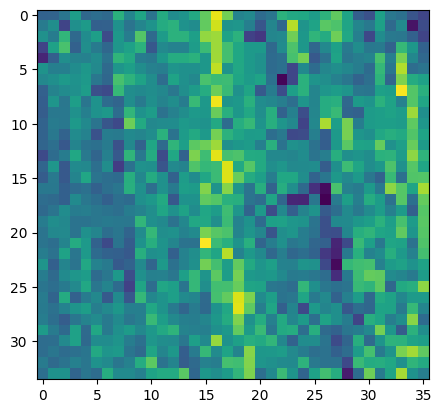

In [8]:
import matplotlib.pyplot as plt
plt.imshow(aviris_subset[1,:,:])
plt.show()

In [7]:
bands = aviris_img_org.RasterCount
driver = aviris_img_org.GetDriver()
projection = aviris_img_org.GetProjection()
geotransform = aviris_img_org.GetGeoTransform()

In [11]:
out_filename = 'F:/wenqu/Aviris/site2a/resample/aviris_resample_clip_final_update3'
out_ds = driver.Create(out_filename, xsize, ysize, bands, aviris_img_org.GetRasterBand(1).DataType)


In [13]:
out_ds.SetGeoTransform((x_min, geotransform[1], 0, y_max, 0, geotransform[5]))
out_ds.SetProjection(projection)


0

In [16]:
for i in range(bands):
    band = aviris_img_org.GetRasterBand(i + 1)
    data = band.ReadAsArray(x_offset, y_offset, xsize, ysize)
    out_band = out_ds.GetRasterBand(i + 1)
    out_band.WriteArray(data)


In [17]:
out_ds = None
in_ds = None


In [12]:
# Loop through each row and column of pixels
cor_dic = {}

for y in range(aviris_img.RasterYSize):
    for x in range(aviris_img.RasterXSize):
        print(x,y)
        pixel_name = [x,y]      
        print(pixel_name)
        # Calculate the UTM coordinates of the pixel using the geotransform and transformation objects
        pixel_x = aviris_geotransform[0] + x * aviris_geotransform[1] + y * aviris_geotransform[2]
        pixel_y = aviris_geotransform[3] + x * aviris_geotransform[4] + y * aviris_geotransform[5]
        pixel_cor = [pixel_x, pixel_y]
        print(pixel_cor)
        cor_dic[(x,y)] = [pixel_x, pixel_y]
        print(f"Pixel ({x},{y}): UTM ({pixel_x:.2f}, {pixel_y:.2f})")

0 0
[0, 0]
[624178.1031998915, 7476931.511156901]
Pixel (0,0): UTM (624178.10, 7476931.51)
1 0
[1, 0]
[624184.2571101509, 7476931.511156901]
Pixel (1,0): UTM (624184.26, 7476931.51)
2 0
[2, 0]
[624190.4110204101, 7476931.511156901]
Pixel (2,0): UTM (624190.41, 7476931.51)
3 0
[3, 0]
[624196.5649306695, 7476931.511156901]
Pixel (3,0): UTM (624196.56, 7476931.51)
4 0
[4, 0]
[624202.7188409289, 7476931.511156901]
Pixel (4,0): UTM (624202.72, 7476931.51)
5 0
[5, 0]
[624208.8727511881, 7476931.511156901]
Pixel (5,0): UTM (624208.87, 7476931.51)
6 0
[6, 0]
[624215.0266614475, 7476931.511156901]
Pixel (6,0): UTM (624215.03, 7476931.51)
7 0
[7, 0]
[624221.1805717068, 7476931.511156901]
Pixel (7,0): UTM (624221.18, 7476931.51)
8 0
[8, 0]
[624227.3344819661, 7476931.511156901]
Pixel (8,0): UTM (624227.33, 7476931.51)
9 0
[9, 0]
[624233.4883922255, 7476931.511156901]
Pixel (9,0): UTM (624233.49, 7476931.51)
10 0
[10, 0]
[624239.6423024848, 7476931.511156901]
Pixel (10,0): UTM (624239.64, 7476931.

Pixel (2,15): UTM (624190.41, 7476843.68)
3 15
[3, 15]
[624196.5649306695, 7476843.681707766]
Pixel (3,15): UTM (624196.56, 7476843.68)
4 15
[4, 15]
[624202.7188409289, 7476843.681707766]
Pixel (4,15): UTM (624202.72, 7476843.68)
5 15
[5, 15]
[624208.8727511881, 7476843.681707766]
Pixel (5,15): UTM (624208.87, 7476843.68)
6 15
[6, 15]
[624215.0266614475, 7476843.681707766]
Pixel (6,15): UTM (624215.03, 7476843.68)
7 15
[7, 15]
[624221.1805717068, 7476843.681707766]
Pixel (7,15): UTM (624221.18, 7476843.68)
8 15
[8, 15]
[624227.3344819661, 7476843.681707766]
Pixel (8,15): UTM (624227.33, 7476843.68)
9 15
[9, 15]
[624233.4883922255, 7476843.681707766]
Pixel (9,15): UTM (624233.49, 7476843.68)
10 15
[10, 15]
[624239.6423024848, 7476843.681707766]
Pixel (10,15): UTM (624239.64, 7476843.68)
11 15
[11, 15]
[624245.7962127441, 7476843.681707766]
Pixel (11,15): UTM (624245.80, 7476843.68)
12 15
[12, 15]
[624251.9501230035, 7476843.681707766]
Pixel (12,15): UTM (624251.95, 7476843.68)
13 15
[13

In [6]:
trait_img_array = trait_img.ReadAsArray() 
trait_img_array.shape

(5470, 5756)

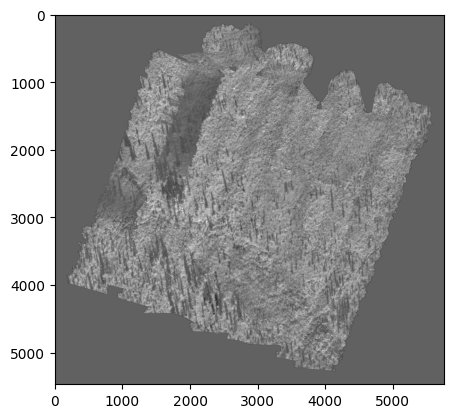

In [7]:
import matplotlib.pyplot as plt
plt.imshow(trait_img_array, cmap='gray')
plt.show()

In [9]:
x = aviris_img.RasterXSize
y = aviris_img.RasterYSize
x,y

(27, 27)

In [10]:
pixel = aviris_img.ReadAsArray(0, 0, 1, 1)

In [11]:
pixel.shape

(122, 1, 1)

In [13]:
cor_dic

{(0, 0): [624178.1031998915, 7476931.511156901],
 (1, 0): [624184.2571101509, 7476931.511156901],
 (2, 0): [624190.4110204101, 7476931.511156901],
 (3, 0): [624196.5649306695, 7476931.511156901],
 (4, 0): [624202.7188409289, 7476931.511156901],
 (5, 0): [624208.8727511881, 7476931.511156901],
 (6, 0): [624215.0266614475, 7476931.511156901],
 (7, 0): [624221.1805717068, 7476931.511156901],
 (8, 0): [624227.3344819661, 7476931.511156901],
 (9, 0): [624233.4883922255, 7476931.511156901],
 (10, 0): [624239.6423024848, 7476931.511156901],
 (11, 0): [624245.7962127441, 7476931.511156901],
 (12, 0): [624251.9501230035, 7476931.511156901],
 (13, 0): [624258.1040332628, 7476931.511156901],
 (14, 0): [624264.2579435221, 7476931.511156901],
 (15, 0): [624270.4118537814, 7476931.511156901],
 (16, 0): [624276.5657640408, 7476931.511156901],
 (17, 0): [624282.7196743, 7476931.511156901],
 (18, 0): [624288.8735845594, 7476931.511156901],
 (19, 0): [624295.0274948188, 7476931.511156901],
 (20, 0): [62

In [14]:
value = cor_dic.get((13, 0))
value

[624258.1040332628, 7476931.511156901]

In [15]:
subset = []
for i in range(26):
    for j in range(26):
#         print(i,j)
        x_upleft = i
        y_upleft = j
        x_lwright = i + 1
        y_lwright = j + 1
        print(x_upleft, y_upleft, x_lwright, y_lwright)
        x_max, y_min = cor_dic.get((x_lwright, y_lwright))
        x_min, y_max = cor_dic.get((x_upleft, y_upleft))
        x_offset = int((x_min - trait_geotransform[0]) / trait_geotransform[1])
        y_offset = int((trait_geotransform[3] - y_min) / abs(trait_geotransform[5]))
        xsize = int((x_max - x_min) / trait_geotransform[1])
        ysize = int((y_max - y_min) / abs(trait_geotransform[5]))
        subset.append(trait_img.ReadAsArray(x_offset, y_offset, xsize, ysize))

0 0 1 1
0 1 1 2
0 2 1 3
0 3 1 4
0 4 1 5
0 5 1 6
0 6 1 7
0 7 1 8
0 8 1 9
0 9 1 10
0 10 1 11
0 11 1 12
0 12 1 13
0 13 1 14
0 14 1 15
0 15 1 16
0 16 1 17
0 17 1 18
0 18 1 19
0 19 1 20
0 20 1 21
0 21 1 22
0 22 1 23
0 23 1 24
0 24 1 25
0 25 1 26
1 0 2 1
1 1 2 2
1 2 2 3
1 3 2 4
1 4 2 5
1 5 2 6
1 6 2 7
1 7 2 8
1 8 2 9
1 9 2 10
1 10 2 11
1 11 2 12
1 12 2 13
1 13 2 14
1 14 2 15
1 15 2 16
1 16 2 17
1 17 2 18
1 18 2 19
1 19 2 20
1 20 2 21
1 21 2 22
1 22 2 23
1 23 2 24
1 24 2 25
1 25 2 26
2 0 3 1
2 1 3 2
2 2 3 3
2 3 3 4
2 4 3 5
2 5 3 6
2 6 3 7
2 7 3 8
2 8 3 9
2 9 3 10
2 10 3 11
2 11 3 12
2 12 3 13
2 13 3 14
2 14 3 15
2 15 3 16
2 16 3 17
2 17 3 18
2 18 3 19
2 19 3 20
2 20 3 21
2 21 3 22
2 22 3 23
2 23 3 24
2 24 3 25
2 25 3 26
3 0 4 1
3 1 4 2
3 2 4 3
3 3 4 4
3 4 4 5
3 5 4 6
3 6 4 7
3 7 4 8
3 8 4 9
3 9 4 10
3 10 4 11
3 11 4 12
3 12 4 13
3 13 4 14
3 14 4 15
3 15 4 16
3 16 4 17
3 17 4 18
3 18 4 19
3 19 4 20
3 20 4 21
3 21 4 22
3 22 4 23
3 23 4 24
3 24 4 25
3 25 4 26
4 0 5 1
4 1 5 2
4 2 5 3
4 3 5 4
4 4 

In [16]:
import numpy as np
subset = np.array(subset)
subset.shape

(676, 201, 212)

In [17]:
for i in range(676):
    print(subset[i,:,:].shape)

(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)
(201, 212)

In [20]:
# Initialize an empty array
result1 = np.empty((0, subset.shape[1]))


# Loop through arrays and concatenate them
for i in range(26):
    result1 = np.concatenate((result1, subset[i,:,:]), axis=0)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 201 and the array at index 1 has size 212

In [23]:
# Initialize an empty array 27x27
result = np.array([])
for i in range(27):
    for n in range(27*i):
        print(i, n)
#     print(range1)
#     print(subset[i, :, :].shape)
#     result = np.concatenate((result, array), axis=0)

1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
2 50
2 51
2 52
2 53
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 39
3 40
3 41
3 42
3 43
3 44
3 45
3 46
3 47
3 48
3 49
3 50
3 51
3 52
3 53
3 54
3 55
3 56
3 57
3 58
3 59
3 60
3 61
3 62
3 63
3 64
3 65
3 66
3 67
3 68
3 69
3 70
3 71
3 72
3 73
3 74
3 75
3 76
3 77
3 78
3 79
3 80
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
4 26
4 27
4 28
4 29
4 30
4 31
4 32
4 33
4 34
4 35
4 36
4 37
4 38
4 39
4 40
4 41
4 42
4 43
4 44
4 45


13 256
13 257
13 258
13 259
13 260
13 261
13 262
13 263
13 264
13 265
13 266
13 267
13 268
13 269
13 270
13 271
13 272
13 273
13 274
13 275
13 276
13 277
13 278
13 279
13 280
13 281
13 282
13 283
13 284
13 285
13 286
13 287
13 288
13 289
13 290
13 291
13 292
13 293
13 294
13 295
13 296
13 297
13 298
13 299
13 300
13 301
13 302
13 303
13 304
13 305
13 306
13 307
13 308
13 309
13 310
13 311
13 312
13 313
13 314
13 315
13 316
13 317
13 318
13 319
13 320
13 321
13 322
13 323
13 324
13 325
13 326
13 327
13 328
13 329
13 330
13 331
13 332
13 333
13 334
13 335
13 336
13 337
13 338
13 339
13 340
13 341
13 342
13 343
13 344
13 345
13 346
13 347
13 348
13 349
13 350
14 0
14 1
14 2
14 3
14 4
14 5
14 6
14 7
14 8
14 9
14 10
14 11
14 12
14 13
14 14
14 15
14 16
14 17
14 18
14 19
14 20
14 21
14 22
14 23
14 24
14 25
14 26
14 27
14 28
14 29
14 30
14 31
14 32
14 33
14 34
14 35
14 36
14 37
14 38
14 39
14 40
14 41
14 42
14 43
14 44
14 45
14 46
14 47
14 48
14 49
14 50
14 51
14 52
14 53
14 54
14 55
14 56
14 

19 147
19 148
19 149
19 150
19 151
19 152
19 153
19 154
19 155
19 156
19 157
19 158
19 159
19 160
19 161
19 162
19 163
19 164
19 165
19 166
19 167
19 168
19 169
19 170
19 171
19 172
19 173
19 174
19 175
19 176
19 177
19 178
19 179
19 180
19 181
19 182
19 183
19 184
19 185
19 186
19 187
19 188
19 189
19 190
19 191
19 192
19 193
19 194
19 195
19 196
19 197
19 198
19 199
19 200
19 201
19 202
19 203
19 204
19 205
19 206
19 207
19 208
19 209
19 210
19 211
19 212
19 213
19 214
19 215
19 216
19 217
19 218
19 219
19 220
19 221
19 222
19 223
19 224
19 225
19 226
19 227
19 228
19 229
19 230
19 231
19 232
19 233
19 234
19 235
19 236
19 237
19 238
19 239
19 240
19 241
19 242
19 243
19 244
19 245
19 246
19 247
19 248
19 249
19 250
19 251
19 252
19 253
19 254
19 255
19 256
19 257
19 258
19 259
19 260
19 261
19 262
19 263
19 264
19 265
19 266
19 267
19 268
19 269
19 270
19 271
19 272
19 273
19 274
19 275
19 276
19 277
19 278
19 279
19 280
19 281
19 282
19 283
19 284
19 285
19 286
19 287
19 288
19 289

21 441
21 442
21 443
21 444
21 445
21 446
21 447
21 448
21 449
21 450
21 451
21 452
21 453
21 454
21 455
21 456
21 457
21 458
21 459
21 460
21 461
21 462
21 463
21 464
21 465
21 466
21 467
21 468
21 469
21 470
21 471
21 472
21 473
21 474
21 475
21 476
21 477
21 478
21 479
21 480
21 481
21 482
21 483
21 484
21 485
21 486
21 487
21 488
21 489
21 490
21 491
21 492
21 493
21 494
21 495
21 496
21 497
21 498
21 499
21 500
21 501
21 502
21 503
21 504
21 505
21 506
21 507
21 508
21 509
21 510
21 511
21 512
21 513
21 514
21 515
21 516
21 517
21 518
21 519
21 520
21 521
21 522
21 523
21 524
21 525
21 526
21 527
21 528
21 529
21 530
21 531
21 532
21 533
21 534
21 535
21 536
21 537
21 538
21 539
21 540
21 541
21 542
21 543
21 544
21 545
21 546
21 547
21 548
21 549
21 550
21 551
21 552
21 553
21 554
21 555
21 556
21 557
21 558
21 559
21 560
21 561
21 562
21 563
21 564
21 565
21 566
22 0
22 1
22 2
22 3
22 4
22 5
22 6
22 7
22 8
22 9
22 10
22 11
22 12
22 13
22 14
22 15
22 16
22 17
22 18
22 19
22 20
22

24 159
24 160
24 161
24 162
24 163
24 164
24 165
24 166
24 167
24 168
24 169
24 170
24 171
24 172
24 173
24 174
24 175
24 176
24 177
24 178
24 179
24 180
24 181
24 182
24 183
24 184
24 185
24 186
24 187
24 188
24 189
24 190
24 191
24 192
24 193
24 194
24 195
24 196
24 197
24 198
24 199
24 200
24 201
24 202
24 203
24 204
24 205
24 206
24 207
24 208
24 209
24 210
24 211
24 212
24 213
24 214
24 215
24 216
24 217
24 218
24 219
24 220
24 221
24 222
24 223
24 224
24 225
24 226
24 227
24 228
24 229
24 230
24 231
24 232
24 233
24 234
24 235
24 236
24 237
24 238
24 239
24 240
24 241
24 242
24 243
24 244
24 245
24 246
24 247
24 248
24 249
24 250
24 251
24 252
24 253
24 254
24 255
24 256
24 257
24 258
24 259
24 260
24 261
24 262
24 263
24 264
24 265
24 266
24 267
24 268
24 269
24 270
24 271
24 272
24 273
24 274
24 275
24 276
24 277
24 278
24 279
24 280
24 281
24 282
24 283
24 284
24 285
24 286
24 287
24 288
24 289
24 290
24 291
24 292
24 293
24 294
24 295
24 296
24 297
24 298
24 299
24 300
24 301

26 199
26 200
26 201
26 202
26 203
26 204
26 205
26 206
26 207
26 208
26 209
26 210
26 211
26 212
26 213
26 214
26 215
26 216
26 217
26 218
26 219
26 220
26 221
26 222
26 223
26 224
26 225
26 226
26 227
26 228
26 229
26 230
26 231
26 232
26 233
26 234
26 235
26 236
26 237
26 238
26 239
26 240
26 241
26 242
26 243
26 244
26 245
26 246
26 247
26 248
26 249
26 250
26 251
26 252
26 253
26 254
26 255
26 256
26 257
26 258
26 259
26 260
26 261
26 262
26 263
26 264
26 265
26 266
26 267
26 268
26 269
26 270
26 271
26 272
26 273
26 274
26 275
26 276
26 277
26 278
26 279
26 280
26 281
26 282
26 283
26 284
26 285
26 286
26 287
26 288
26 289
26 290
26 291
26 292
26 293
26 294
26 295
26 296
26 297
26 298
26 299
26 300
26 301
26 302
26 303
26 304
26 305
26 306
26 307
26 308
26 309
26 310
26 311
26 312
26 313
26 314
26 315
26 316
26 317
26 318
26 319
26 320
26 321
26 322
26 323
26 324
26 325
26 326
26 327
26 328
26 329
26 330
26 331
26 332
26 333
26 334
26 335
26 336
26 337
26 338
26 339
26 340
26 341

In [14]:
# Define the range of coordinates to extract
xmin, ymax, xmax, ymin = (624227.33, 7476820.26, 624233.49, 7476814.41)

In [15]:
#calculate how many pixels it will cover
#x, y offset is the starting poit for the subset
# Calculate the x and y offsets for the subset
x_offset = int((xmin - trait_geotransform[0]) / trait_geotransform[1])
y_offset = int((trait_geotransform[3] - ymin) / abs(trait_geotransform[5]))
x_offset, y_offset

(1709, 4048)

In [16]:
xsize = int((xmax - xmin) / trait_geotransform[1])
ysize = int((ymax - ymin) / abs(trait_geotransform[5]))
xsize, ysize

(212, 201)

In [19]:
# Read the subset of pixel values from the raster image using gdal
subset = trait_img.ReadAsArray(x_offset, y_offset, xsize, ysize)


In [20]:
subset.shape

(201, 212)

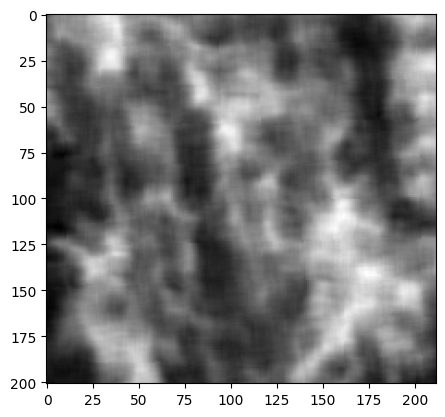

In [21]:
plt.imshow(subset, cmap='gray')
plt.show()